## Linear Model Assumptions

Some of the main linear regression model assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random, normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

**Failure to meet one or more of the model assumptions could end up in poor model performance**. In other words, the variables do not accurately predict the outcome, with a linear model.

If the assumptions are not met:

- use a different no-linear model to predict the outcome from the variables
- transform the input variables so that they fulfill the assumptions.
- discretisation.



The following steps are taken:

- train a linear model to predict a target from 3 predictor variables
- evaluate if the model is accurate by examining the residuals
- determine if the residuals are normally distributed
- if there is homoscedasticity
- transform the data and see how this improves model performance
- examine Correlation and Linear relationship between variables and outcome

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

# for images
from IPython.display import Image

In [2]:
# load the Boston House price data

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# information about the boston house prince dataset

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Build a linear model 

In [4]:
# using 3 variables of choice (LSTAT, RM and CRIM),
# separating into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [5]:
# the features scaling

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
# building a linear model using the data as loaded from sklearn

linreg = LinearRegression()

linreg.fit(scaler.transform(X_train), y_train)

# making predictions on the train set and calculating the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# making predictions on the test set and calculating the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.2000629530844



## Calculate the residuals

In [7]:
# calculating the residuals

error = y_test - pred
error

329    -3.570111
371    26.919564
219    -1.617731
403    -2.215125
78     -1.622124
         ...    
4       4.432562
428    -5.502196
385     2.184463
308    -6.538091
5       0.801369
Name: MEDV, Length: 152, dtype: float64

## Test residuals normality

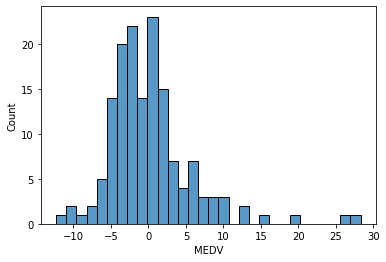

In [8]:
# making a histogram to determine 
# if the residuals are normally distributed with a mean value at 0

sns.histplot(error, bins=30)
plt.show()

The residuals show a fairly normal (but not perfect) distribution centered at 0, with some skew towards the left, with a few higher unusual values towards the right of the distribution.

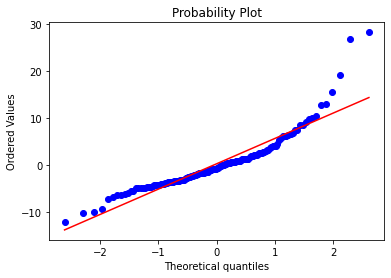

In [9]:
# got a thought that it'd be visualize residuals distribution with 
# a Q-Q plot. 

# if the residuals are normally distributed,
# the dots should adjust to the linear line

# expected: dods mostly adjust to the line but some outlies are there

stats.probplot(error, dist="norm", plot=plt)
plt.show()

In [10]:
# as expected

## Homoscedasticity

__What is it:__
Homoscedasticity implies that at each level of the predictor variable(s), the variance of the residual terms should be constant. So it is needed to plot the residuals against the variables.

Homoscedasticity is nothing but homogeneity of variance. It describes a situation in which the error term in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

__How to visualize:__
The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

In [11]:
# defining the homoscedasticity plot function
def homoscedasticity_plot(var):
    plt.scatter(x=X_test[var], y=error)
    plt.xlabel(var)
    plt.ylabel('Residuals')

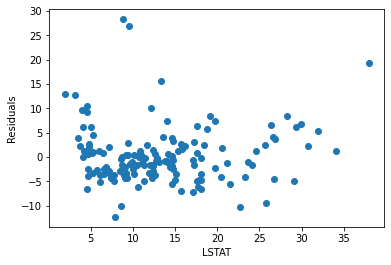

In [12]:
# plotting the residuals vs one of the independent variables: LSTAT 
homoscedasticity_plot("LSTAT")

The residuals seem fairly homogeneously distributed across the values of LSTAT.

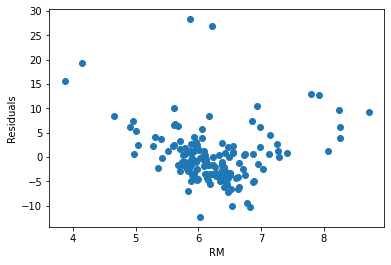

In [13]:
# plotting the residuals vs one of the independent variables: RM 
homoscedasticity_plot("RM")

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

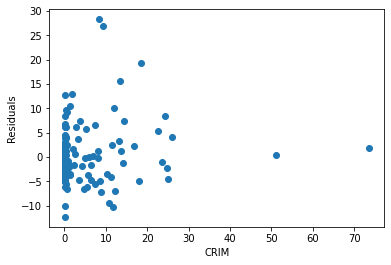

In [14]:
# plotting the residuals vs one of the independent variables: CRIM 
homoscedasticity_plot("CRIM")

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because there are very few data points for CRIM when its values are high.

## Automating Residual analysis with Yellowbrick

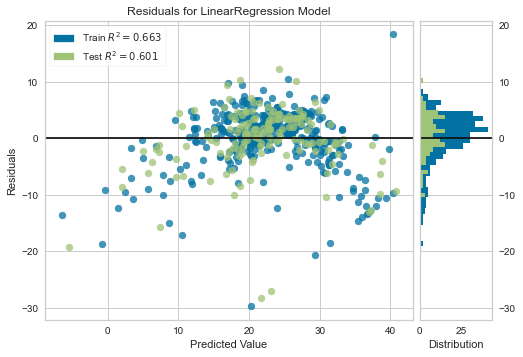

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)
visualizer.score(scaler.transform(X_test), y_test)
visualizer.poof()

On the right, the distribution of the residuals in the train and test sets is not perfectly centered at 0.

On the left, residuals vs the predicted value distribution show that the variance is not constant. Towards the extremes of the predictions, the model is under-estimating the outcome as most residuals are negative. And towards the center of the predictions, the model is over-estimating the outcome. So the variance of the residuals is not constant for all values.

## Transform the data to improve model fit

__Using the Box-Cox transformation__

In [16]:
import scipy.stats as stats

# apply the box-cox transformation to the variables
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [17]:
# the features scaling

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
# model building right below:

# specifying the model
linreg = LinearRegression()

# fitting the model
linreg.fit(scaler.transform(X_train), y_train)

# making predictions and calculating the mean squared error over the train set
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# making predictions and calculating the mean squared error over the test set
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



In [19]:
# now, training and test sets linear regression mse-s are smaller compare to 
# mse-s before the transformation

### Calculate residuals

In [20]:
# calculating the residuals

error = y_test - pred

### Residual normality

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

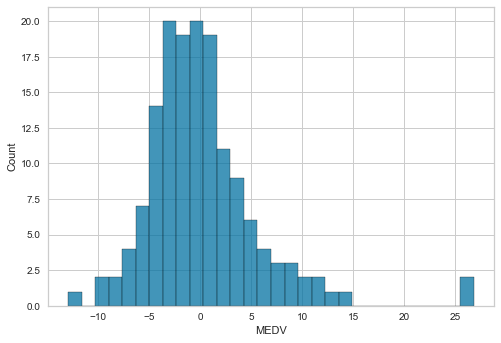

In [21]:
# a histogram checking if the residuals are normally distributed with mean value at 0

sns.histplot(error, bins=30)

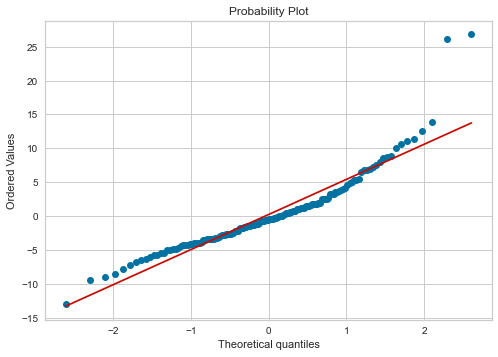

In [22]:
# a Q-Q plot. 

# expected: dods mostly better adjust to the line; fewer outliers should be there

stats.probplot(error, dist="norm", plot=plt)
plt.show()

An improvement: the residuals are now more normally distributed.

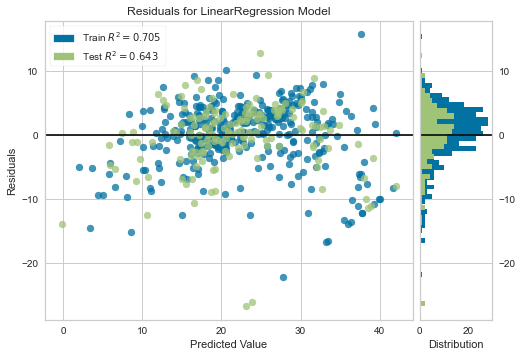

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
# the plot analysis with yellowbrick

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)
visualizer.score(scaler.transform(X_test), y_test)
visualizer.poof()

There is a noticeable improvement in the distribution of the residuals, now better centered at 0, and with a more even variance across all values of the prediction.

__Plotting the residuals vs the transformed variables__

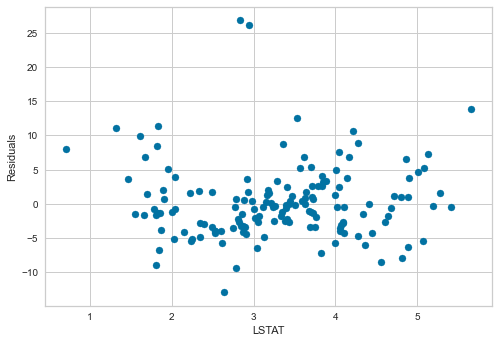

In [24]:
# plotting again the residuals vs the transformed variables. 

# for LSTAT after the transformation (but the target is not transformed)

homoscedasticity_plot("LSTAT")

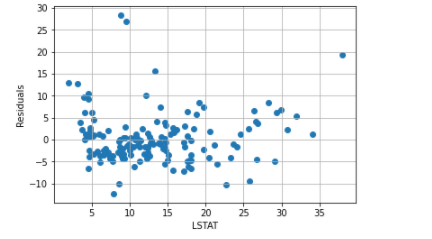

In [25]:
# compare to LSTAT before the transformation 
Image("transformed_for_linear_model_scrns\homesced_LSTAT_before_transf.png")

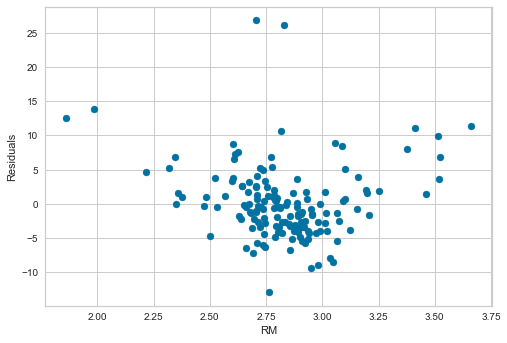

In [26]:
# for RM after the transformation (but the target is not transformed)

homoscedasticity_plot("RM")

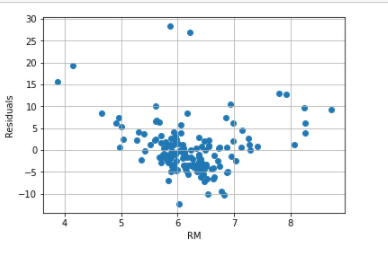

In [27]:
# compare to RM before the transformation 
Image("transformed_for_linear_model_scrns\homesced_RM_before_transf.png")

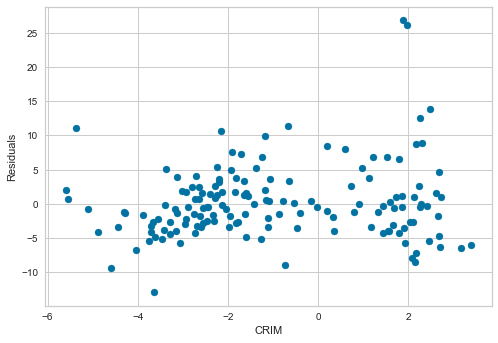

In [28]:
# for CRUM after the transformation (but the target is not transformed)

homoscedasticity_plot("CRIM")

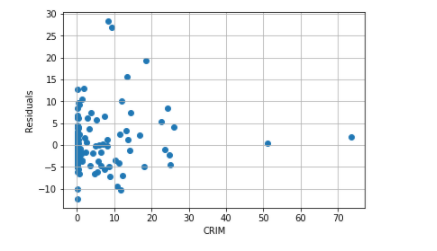

In [29]:
# compare to CRIM before the transformation 
Image("transformed_for_linear_model_scrns\homesced_CRIM_before_transf.png")

__Model improwment with the transformed target__

In [30]:
boston['MEDV'], _ = stats.boxcox(boston['MEDV'])

# training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# the features scaling
scaler = StandardScaler()
scaler.fit(X_train)

# instantiate a lineear model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate
# the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

# calculate the residuals
error = y_test - pred


Train set
Linear Regression mse: 0.1648266220696038
Test set
Linear Regression mse: 0.2119952269315284



<AxesSubplot:xlabel='MEDV', ylabel='Count'>

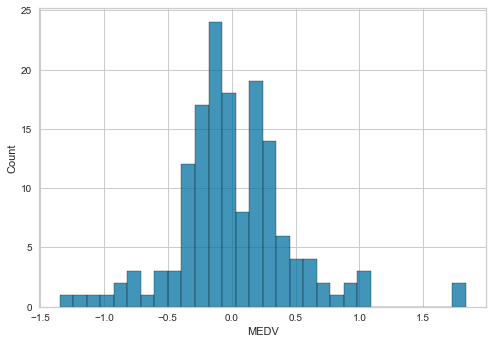

In [31]:
sns.histplot(error, bins=30)

In [32]:
# wow, the error distribution is quite a normal

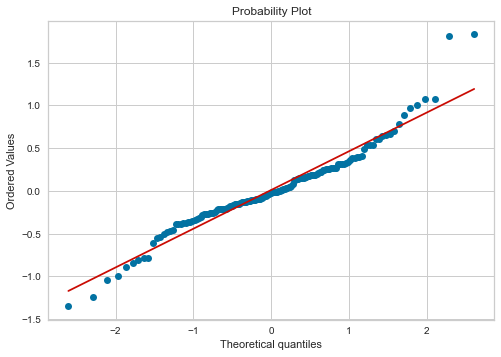

In [33]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

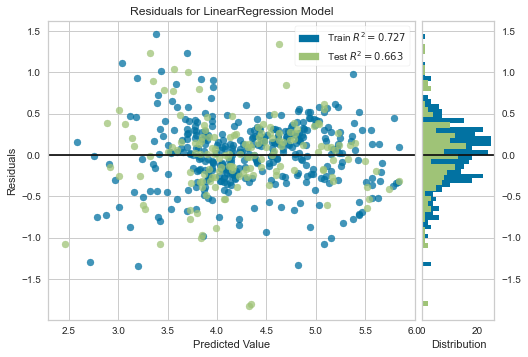

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [34]:
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

## Testing other model assumptions

In [35]:
# create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

np.random.seed(29)

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

### Scatter plots

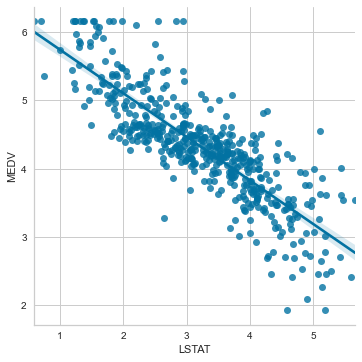

In [36]:
# (noted: variables are transformed already)

# LAST vs MEDV plotting

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left side of the plot.

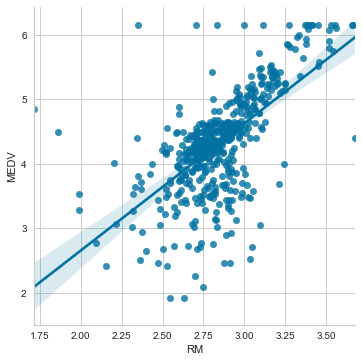

In [37]:
# RM vs MEDV plotting

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between the target and transformed RM is not very linear. It could be considered, transforming this variable further, removing the variable from the model, or using a non-linear model to predict MEDV from RM.

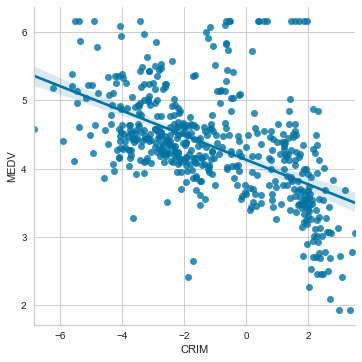

In [38]:
# CRIM vs MEDV plotting

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

The relationship is also not perfectly linear between CRIM and MEDV.

Even though the relationships after the transformation are not perfectly linear, transformation gained some linearity to independent variables

## Normally Distributed Errors

In [39]:
# this is something that was done above but gonna do it again

# main steps for this assumption:
# - make a linear regression model using the desired variables (X)
# - obtain the predictions
# - determine the error (True house price - predicted house price)
# - observe the distribution of the error.

# since all them have been done, here is error plot:

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

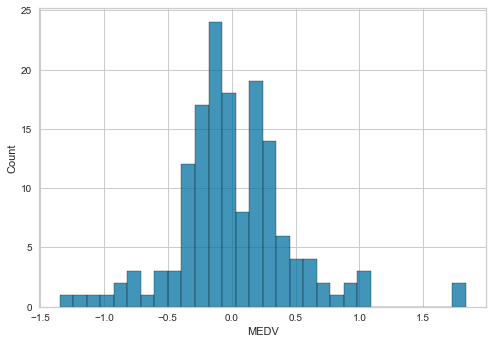

In [40]:
# they should follow a gaussian distribution
sns.histplot(error, bins=30)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

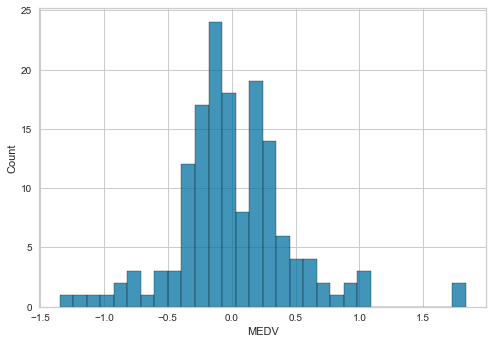

In [41]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.histplot(error, bins=30)

The residuals are quite centered around zero, and the distribution is Gaussian more or less.

## Multicollinearity

To determine co-linearity -- evaluate the correlation of all the independent variables in the dataframe.

<AxesSubplot:>

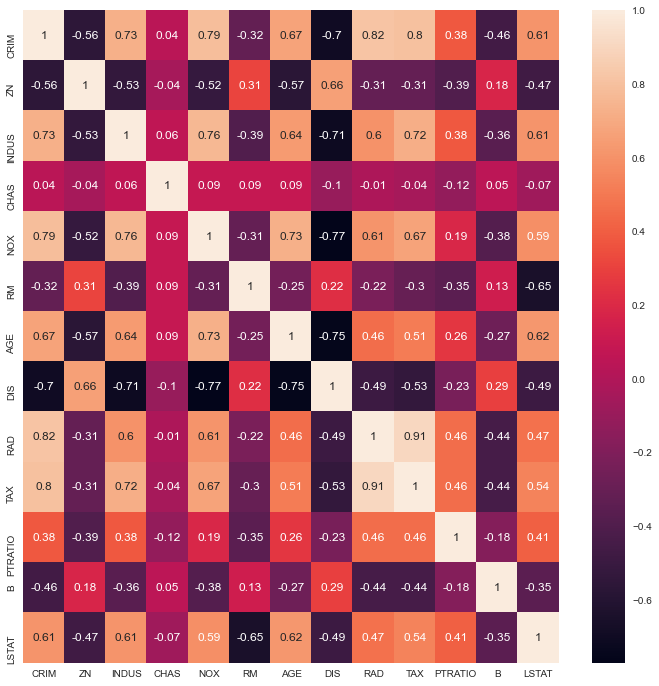

In [42]:
# capture features in a list
features = boston_dataset.feature_names

# getting correlation
correlation_matrix = boston[features].corr().round(2)

#plotting
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

High correlation: 
- CRIM and DIS
- INDUS and DIS
- AGE and DIS
- RM and LSTAT
- NOX and DIS
- RAD and TAX
- CRIM and NOX
<br>etc.

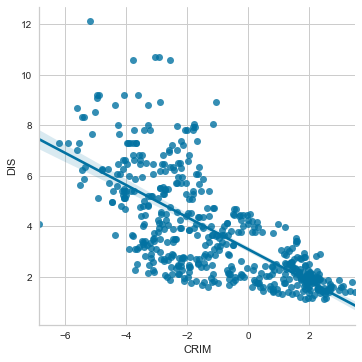

In [43]:
# putting they look in a scatter plot.

# CRIM and DIS
sns.lmplot(x="CRIM", y="DIS", data=boston, order=1)

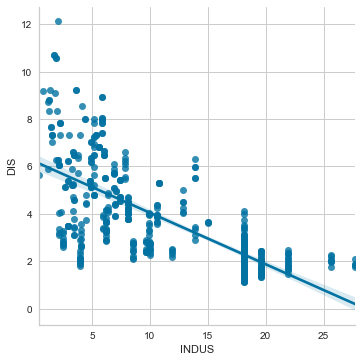

In [44]:
# INDUS and DIS
sns.lmplot(x="INDUS", y="DIS", data=boston, order=1)

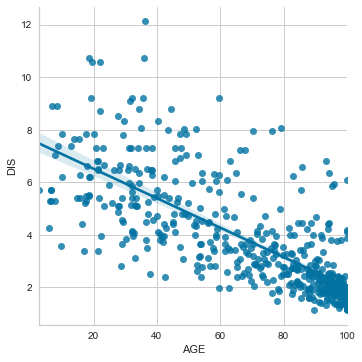

In [45]:
# AGE and DIS
sns.lmplot(x="AGE", y="DIS", data=boston, order=1)

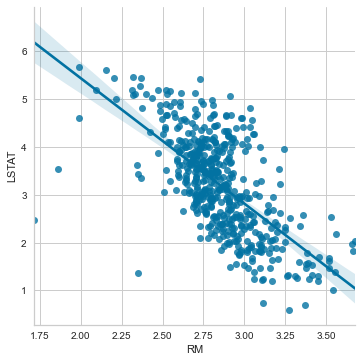

In [46]:
# RM and LSTAT
sns.lmplot(x="RM", y="LSTAT", data=boston, order=1)

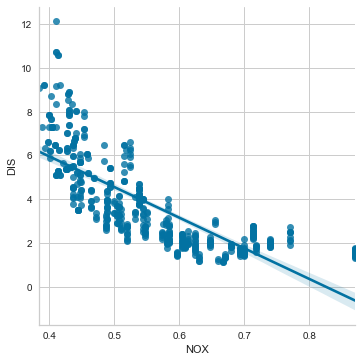

In [47]:
# NOX and DIS
sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

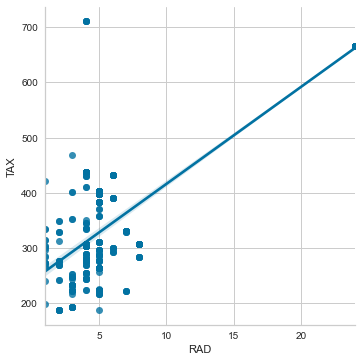

In [48]:
# RAD and TAX
sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

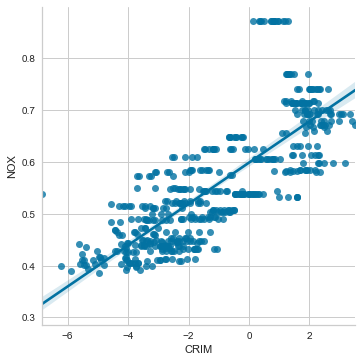

In [49]:
# CRIM and NOX
sns.lmplot(x="CRIM", y="NOX", data=boston, order=1)

There are a lot of NOX and DIS correlations with other features (some of correlations are linear), so NOX and DIS should be put off.